# Question 4

### Question 4 [10 points]

Reproduce Figure 1 in the paper. When doing that, try to slice data using `xarray` in the most clear and reproducible way (for example, don't use indices to access data objects like we did in the example above).

In [1]:
#Question 4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [2]:
climatology = ds.analysed_sst.sel(time = slice('2002', '2012')).groupby('time.month').mean()

In [3]:
ds_2014 = ds.analysed_sst.sel(time = '2014')
anomaly_2014 = ds_2014.groupby('time.month').mean() - climatology

ds_2015 = ds.analysed_sst.sel(time = '2015')
anomaly_2015 = ds_2015.groupby('time.month').mean() - climatology

ds_2016 = ds.analysed_sst.sel(time = '2016')
anomaly_2016 = ds_2016.groupby('time.month').mean() - climatology

anomaly_year = [anomaly_2014, anomaly_2015, anomaly_2016]

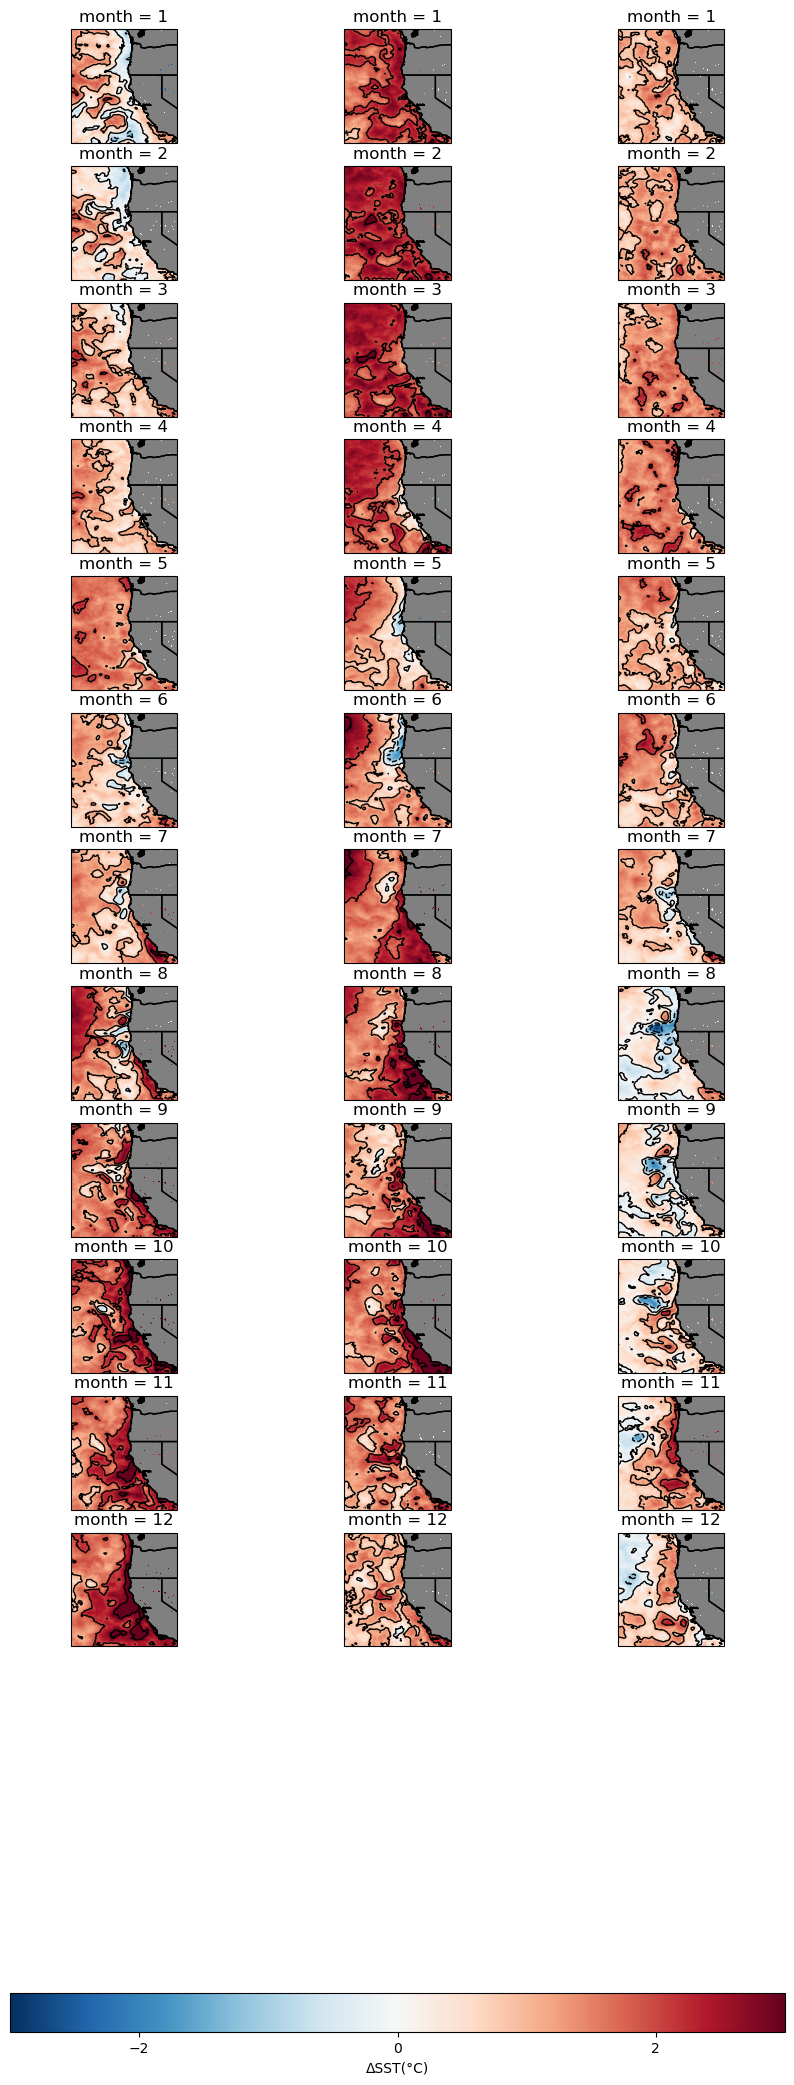

In [6]:
fig, axs = plt.subplots(nrows=12, ncols=3, sharex=True, sharey=True, subplot_kw=dict(projection=crs), figsize=(10, 30))

for year in range(3):
    for month in range(12):
        anomaly_by_year = anomaly_year[year]
        anomaly_by_month = anomaly_by_year[month, :, :]
        plot = anomaly_by_month.plot(ax=axs[month, year], transform=crs, add_colorbar=False, cmap='RdBu_r', vmin=-3, vmax=3)  

        anomaly_by_month.plot.contour(ax=axs[month, year], colors='black', linewidths=1, vmin=-3, vmax=3)

        axs[month, year].coastlines("10m", color="k")
        axs[month, year].add_feature(cfeature.LAND, color="grey")
        axs[month, year].add_feature(cfeature.STATES.with_scale("10m"))

colorBar = plt.colorbar(plot, ax=axs, location='bottom')
colorBar.set_label('ΔSST(°C)')
colorBar.set_ticks(range(-2, 3, 2))

#Things that need to be fixed
# Titles for each year
# Month on year plot
# Resize the color bar